This prediction is based on AGE Prediction should be on based of AGE + Sex
Also I used here is Elimination technique instead of capping

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic_train.shape

(891, 12)

In [5]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
titanic_train['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

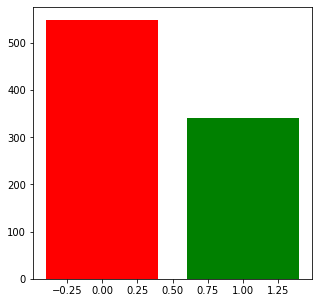

In [11]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=['r','green'])
plt.show()

In [15]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
titanic_train['Pclass'].value_counts().keys()

Int64Index([3, 1, 2], dtype='int64')

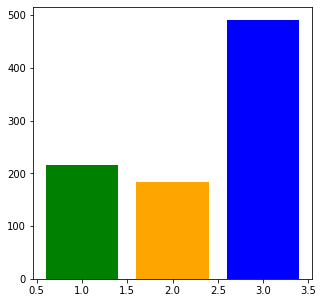

In [17]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=['blue','green','Orange'])
plt.show()

In [18]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

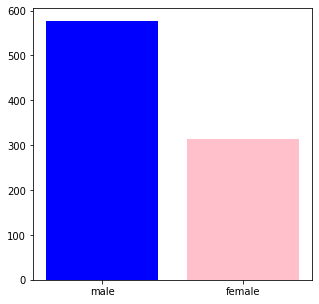

In [19]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=['blue','pink'])
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


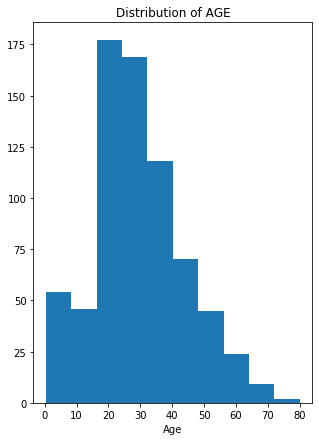

In [22]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title('Distribution of AGE')
plt.xlabel('Age')
plt.show()

In [24]:
titanic_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [25]:
sum(titanic_train['Survived'].isnull())

0

In [26]:
sum(titanic_train['Age'].isnull())

177

In [27]:
titanic_train = titanic_train.dropna()

In [28]:
#building model

In [29]:
sum(titanic_train['Survived'].isnull())

0

In [30]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc = DecisionTreeClassifier()

In [33]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
sum(titanic_test['Age'].isnull())

86

In [37]:
titanic_test=titanic_test.dropna()

In [38]:
sum(titanic_test['Age'].isnull())

0

In [43]:
x_test = titanic_test[['Age']]
x_test

,Age
12,23.0
14,47.0
24,48.0
26,22.0
28,41.0
...,...
404,43.0
405,20.0
407,50.0
411,37.0


In [40]:
y_pred = dtc.predict(x_test)

In [54]:
import numpy as np
print(y_pred)
print(y_pred.shape)

[1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 1 1 1 1 1 0 0 0 1]
(87,)


In [42]:
#in movie there is firstly consantrate on the Aged people and Childrens and females
#in our data set gender=sex and age matters
x_test

,Age
12,23.0
14,47.0
24,48.0
26,22.0
28,41.0
...,...
404,43.0
405,20.0
407,50.0
411,37.0


In [64]:
import pandas as pd 
list_dict = {'PassengerId':titanic_test['PassengerId'], 'Survived':y_pred} 
df = pd.DataFrame(list_dict) 
df.to_csv('answer.csv', index=False) 